In [1]:
import pandas as pd
import numpy as np

In [2]:
spectra = pd.read_csv("spectra.dat", sep="\t")

In [3]:
spectra_data = spectra[1:]
spectra_data = spectra_data.astype(float)
spectra_data

,Lambda,440,470,495,530,595,634,660,684,branco,full
1,194.152420,0.011534,0.007311,0.008760,0.009653,0.010221,0.006451,0.005752,0.003734,0.018989,0.010652
2,194.354370,-0.000009,0.000591,0.000111,0.000858,0.001224,0.001125,0.001836,0.001697,0.009667,0.005833
3,194.556335,0.000103,0.001438,0.002259,0.001650,0.000233,-0.000425,-0.000221,0.003679,0.009298,0.005016
4,194.758316,-0.001900,0.000816,0.001665,0.000688,0.000460,0.001012,-0.002362,0.003790,0.009440,0.005072
5,194.960327,0.003095,0.001776,0.006867,0.005864,0.004506,0.003886,0.005329,0.005074,0.015436,0.008736
...,...,...,...,...,...,...,...,...,...,...,...
3644,1013.778564,-0.012484,-0.014289,-0.014249,-0.016394,-0.013914,-0.011274,-0.008560,-0.003437,-0.020287,-0.012906
3645,1014.019653,-0.014234,-0.015080,-0.015267,-0.017638,-0.017082,-0.012570,-0.009095,-0.003604,-0.020741,-0.014738
3646,1014.260681,-0.011892,-0.015108,-0.013768,-0.015404,-0.015696,-0.010964,-0.008672,-0.003799,-0.021708,-0.012822
3647,1014.501709,-0.015900,-0.014826,-0.016030,-0.016705,-0.018893,-0.010598,-0.011011,-0.002907,-0.021424,-0.016063


In [4]:
irrad = pd.read_csv("irradiancia.dat", sep="\t")

In [5]:
irrad.iloc[4,1::2]

branco1       25
branco2     25.3
440         15.8
470         12.5
495         10.1
530         7.04
595         3.26
634         8.63
660        10.75
684        13.35
full       14.81
Name: 4, dtype: object

Calculating Integrals and Normalizing
=====================================

In [6]:
y_labels = spectra_data.columns[1:]
x_label = "Lambda"

In [7]:
A_star = {} #Integrals for the spectra in arbitrary units

In [8]:
for label in y_labels:
    A_star[label] = np.trapz(spectra_data[label], x=spectra_data[x_label])

In [9]:
pd.Series(A_star)

440        13.289713
470        18.925137
495        18.771848
530        30.994957
595        16.052588
634        18.381114
660        18.729419
684        27.182472
branco    103.859368
full       88.305570
dtype: float64

In [10]:
#Getting Actual areas

In [11]:
A = irrad.iloc[4,1::2].astype(float)

In [12]:
#Making branco=avg(branco1, branco2)

In [13]:
A["branco"] = 0.5*(A["branco1"]+A["branco2"])

In [14]:
A = A[2:] #Removing branco1 and branco2
A

440       15.80
470       12.50
495       10.10
530        7.04
595        3.26
634        8.63
660       10.75
684       13.35
full      14.81
branco    25.15
Name: 4, dtype: float64

In [15]:
normalized_data = (spectra_data.iloc[:,1:]/A_star)*A

In [16]:
normalized_data[x_label] = spectra_data[x_label]

In [17]:
normalized_data

,440,470,495,530,595,634,660,684,branco,full,Lambda
1,0.013713,0.004829,0.004713,0.002193,0.002076,0.003029,0.003301,0.001834,0.004598,0.001786,194.152420
2,-0.000011,0.000390,0.000060,0.000195,0.000249,0.000528,0.001054,0.000834,0.002341,0.000978,194.354370
3,0.000123,0.000950,0.001215,0.000375,0.000047,-0.000200,-0.000127,0.001807,0.002252,0.000841,194.556335
4,-0.002259,0.000539,0.000896,0.000156,0.000093,0.000475,-0.001356,0.001861,0.002286,0.000851,194.758316
5,0.003680,0.001173,0.003694,0.001332,0.000915,0.001825,0.003059,0.002492,0.003738,0.001465,194.960327
...,...,...,...,...,...,...,...,...,...,...,...
3644,-0.014843,-0.009438,-0.007666,-0.003724,-0.002826,-0.005293,-0.004913,-0.001688,-0.004913,-0.002165,1013.778564
3645,-0.016923,-0.009960,-0.008214,-0.004006,-0.003469,-0.005902,-0.005220,-0.001770,-0.005023,-0.002472,1014.019653
3646,-0.014138,-0.009979,-0.007408,-0.003499,-0.003188,-0.005148,-0.004978,-0.001866,-0.005257,-0.002150,1014.260681
3647,-0.018903,-0.009792,-0.008625,-0.003794,-0.003837,-0.004976,-0.006320,-0.001427,-0.005188,-0.002694,1014.501709


In [18]:
#Checking results

In [19]:
sanity_check = {}
for label in y_labels:
    sanity_check[label] = np.trapz(normalized_data[label], x=normalized_data[x_label])

In [20]:
pd.concat([pd.Series(sanity_check), A], axis=1, sort=True)

,0,4
440,15.80,15.80
470,12.50,12.50
495,10.10,10.10
530,7.04,7.04
595,3.26,3.26
634,8.63,8.63
660,10.75,10.75
684,13.35,13.35
branco,25.15,25.15
full,14.81,14.81


In [34]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

In [32]:
import plotly.express as px

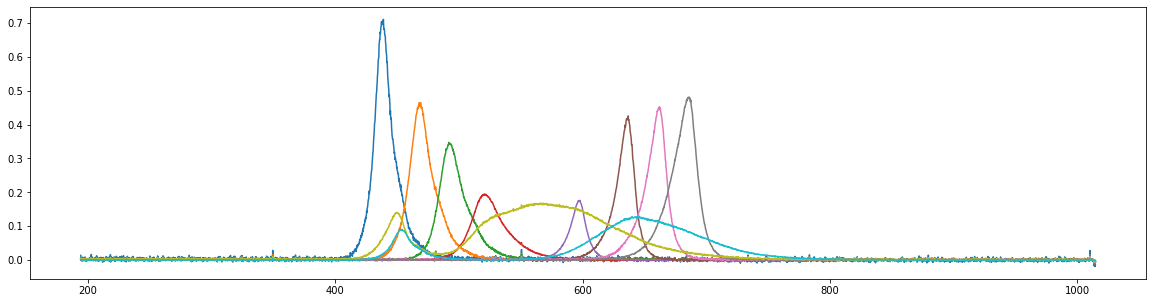

In [37]:
plt.plot(normalized_data[x_label],normalized_data[y_labels])

Fitting Data to Theoretical Curve
=================================

In [24]:
"""
y(x)=f*((2*A/(pi*2*b/(1+exp(c*(x-x0)))))/(1+4*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2))+(1-f)*(A/(2*b/(1+exp(c*(x-x0)))))*(4*ln(2)/pi)*exp(-4*ln(2)*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2)

parametros A,b,c,f,x0
"""

'\ny(x)=f*((2*A/(pi*2*b/(1+exp(c*(x-x0)))))/(1+4*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2))+(1-f)*(A/(2*b/(1+exp(c*(x-x0)))))*(4*ln(2)/pi)*exp(-4*ln(2)*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2)\n\nparametros A,b,c,f,x0\n'

In [42]:
def G(x,A,b,c,f,x0): return f*((2*A/(np.pi*2*b/(1+np.exp(c*(x-x0)))))/(1+4*((x-x0)/(2*b/(1+np.exp(c*(x-x0)))))**2))+(1-f)*(A/(2*b/(1+np.exp(c*(x-x0)))))*(4*np.log(2)/np.pi)*np.exp(-4*np.log(2)*((x-x0)/(2*b/(1+np.exp(c*(x-x0)))))**2)

In [43]:
from scipy.optimize import curve_fit

In [ ]:
#Testing

In [53]:
param, cov = curve_fit(G,normalized_data[x_label],normalized_data["440"], p0=[1.0,100.0,0.0001,100.0,440], method="lm")

In [55]:
A,b,c,f,x0 = param

In [52]:
x = np.linspace(0,1000,1000)

In [56]:
y = G(x,A,b,c,f,x0)

In [65]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objects as go

data = [go.Scatter(x=x,y=y), go.Line(x=normalized_data[x_label], y=normalized_data["440"])]

plot(data)

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




'temp-plot.html'

In [ ]:
#Fitting curves

In [66]:
parameters = {}

In [73]:
p0 = {
    "440":[1.0,100.0,0.0001,100.0,440],
    "470":[1.0,100.0,0.0001,100.0,440],
    "495":[1.0,100.0,0.0001,100.0,495],
    "530":[1.0,100.0,0.0001,100.0,530],
    "595":[1.0,100.0,0.0001,100.0,595],
    "634":[1.0,100.0,0.0001,100.0,634],
    "660":[1.0,100.0,0.0001,100.0,660],
    "684":[1.0,100.0,0.0001,100.0,595],
    "branco":[1.0,1.0,100.0,100.0,0.0001,0.0001,100.0,100.0,450,550],
    "full":[1.0,100.0,0.0001,100.0,595]
}

In [74]:
for label in y_labels:
    if label!="branco":
        try:
            param, cov = curve_fit(G, normalized_data[x_label], normalized_data[label], p0=p0[label], method="lm")
            parameters[label] = param
        except RuntimeError:
            print("RuntimeError", label)
    else:
        def H(x,A0,A1,b0,b1,c0,c1,f0,f1,x00,x01): return G(x,A0,b0,c0,f0,x00) + G(x,A1,b1,c1,f1,x01)
        param, cov = curve_fit(H, normalized_data[x_label], normalized_data[label], p0=p0[label], method="lm")

In [75]:
parameters

{'440': array([ 1.63666397e+01,  1.69691972e+01, -3.76293407e-02,  7.14451936e-01,
         4.38832690e+02]),
 '470': array([ 1.33689915e+01,  2.23983111e+01, -2.61263965e-02,  5.82009421e-01,
         4.69139612e+02]),
 '495': array([ 1.06213750e+01,  2.46220463e+01, -3.13361316e-02,  4.68532757e-01,
         4.93840807e+02]),
 '530': array([ 7.56833673e+00,  3.09270609e+01, -2.23967791e-02,  4.71407571e-01,
         5.22596204e+02]),
 '595': array([3.49010288e+00, 1.49542632e+01, 2.52617944e-02, 6.13223711e-01,
        5.96567625e+02]),
 '634': array([9.11610273e+00, 1.67337580e+01, 4.74188431e-02, 5.59422151e-01,
        6.35223104e+02]),
 '660': array([1.10638220e+01, 1.90622084e+01, 4.77685905e-02, 5.57074705e-01,
        6.60284450e+02]),
 '684': array([1.39317392e+01, 2.38011381e+01, 3.70858586e-02, 4.01264331e-01,
        6.83310577e+02]),
 'full': array([ 1.42725100e+01,  8.95562012e+01, -3.84443346e-03,  3.93578176e-01,
         6.51766552e+02])}